## Observations and Insights

## Dependencies and starter code

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

merged_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [164]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = merged_data.groupby("Drug Regimen")
mean = round(grouped_data[["Tumor Volume (mm3)"]].mean(),2)
median = round(grouped_data[["Tumor Volume (mm3)"]].median(),2)
var = round(grouped_data[["Tumor Volume (mm3)"]].var(),2)
strdev = round(grouped_data[["Tumor Volume (mm3)"]].std(),2)
sem = round(grouped_data[["Tumor Volume (mm3)"]].sem(),2)

merged_a = pd.merge(mean, median, on = "Drug Regimen", suffixes=('_mean', '_median'))
merged_b = pd.merge(merged_a, var, on = "Drug Regimen")
merged_c = pd.merge(merged_b, strdev, on = "Drug Regimen", suffixes=('_var', '_strdev'))
merged_d = pd.merge(merged_c, sem, on = "Drug Regimen")

merged_d.rename(columns={"Tumor Volume (mm3)_mean":"Mean (mm3)",
                         "Tumor Volume (mm3)_median":"Median(mm3)",
                         "Tumor Volume (mm3)_var":"Variance (mm3)",
                         "Tumor Volume (mm3)_strdev":"StrDev (mm3)",
                         "Tumor Volume (mm3)_SEM":"SEM (mm3)"                        
                        })

,Mean (mm3),Median(mm3),Variance (mm3),StrDev (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

Text(0, 0.5, 'No.of data points')

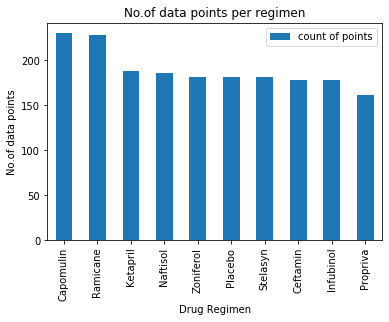

In [114]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count = grouped_data[["Drug Regimen"]].count()

count_a = count.rename(columns={"Drug Regimen":"Drug Regimen", "Drug Regimen":"count of points"})
count_sorted = count_a.sort_values(by="count of points", ascending=False)

pandas_plot = count_sorted.plot(kind='bar',title="No.of data points per regimen")
pandas_plot.set_xlabel("Drug Regimen")
pandas_plot.set_ylabel("No.of data points")

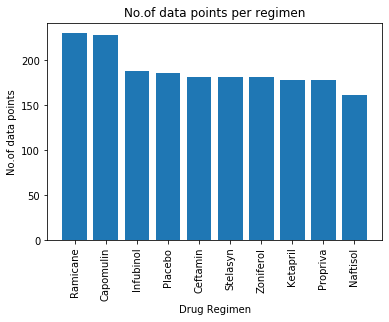

In [115]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_list = merged_data["Drug Regimen"].unique()
drug_count = merged_data["Drug Regimen"].value_counts()

x_axis = drug_list

plt.title("No.of data points per regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No.of data points")

plt.xticks(rotation=90)

plt.bar(x_axis, drug_count)
plt.show()


## Pie plots

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = merged_data.groupby("Sex").count()
gender["Mouse ID"]

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

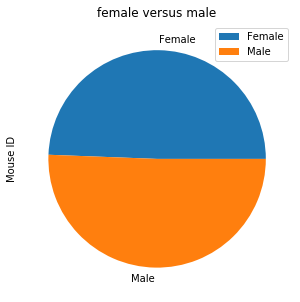

In [117]:
gender_df = pd.DataFrame(gender["Mouse ID"])
gender_df.plot.pie(y='Mouse ID', figsize=(5, 5), title= "female versus male")

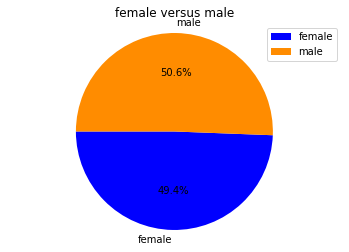

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["female", "male"]
count_sex = gender["Mouse ID"]
colors = ["blue", "darkorange"]
explode = (0, 0)
plt.title("female versus male")
plt.pie(count_sex, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)
plt.axis("equal")
plt.legend()
plt.show()

## Quartiles, outliers and boxplots

In [119]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [120]:
final_df = merged_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
 
last_df = final_df.loc[final_df["Timepoint"] == 45]

last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...
1344,p136,Zoniferol,Female,5,28,45,63.488697,2
1416,q511,Zoniferol,Female,2,28,45,68.611061,3
1434,q633,Zoniferol,Male,12,25,45,70.827796,2
1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [121]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

The lower quartile of tumor volumes observed for the Capomulin regimen is: 32.38 mm3
The upper quartile of tumor volumes observed for the Capomulin regimen is: 40.16 mm3
The interquartile range of tumor volumes observed for the Capomulin regimen is: 7.78 mm3
The the median of tumor volumes observed for the Capomulin regimen is: 37.31mm3 
Values below 20.7 mm3 could be outliers.
Values above 51.83 mm3 could be outliers.


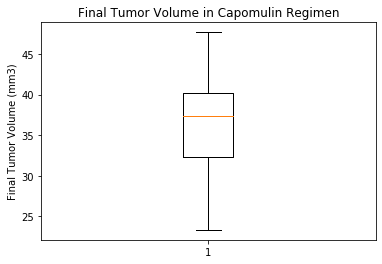

In [151]:
promising_regimen = "Capomulin"
cap_data_all = last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
cap_data_vol = cap_data_all.sort_values(["Tumor Volume (mm3)"], ascending=True)
cap_data_vol = cap_data_vol["Tumor Volume (mm3)"]
cap_data_vol

quartiles = cap_data_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_data_vol)

print(f"The lower quartile of tumor volumes observed for the {promising_regimen} regimen is: {round(lowerq,2)} mm3")
print(f"The upper quartile of tumor volumes observed for the {promising_regimen} regimen is: {round(upperq,2)} mm3")
print(f"The interquartile range of tumor volumes observed for the {promising_regimen} regimen is: {round(iqr,2)} mm3")
print(f"The the median of tumor volumes observed for the {promising_regimen} regimen is: {round(quartiles[0.5],2)}mm3 ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} mm3 could be outliers.")
print(f"Values above {round(upper_bound,2)} mm3 could be outliers.")

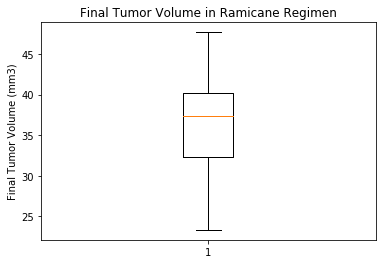

The lower quartile of tumor volumes observed for the Ramicane regimen is: 30.98 mm3
The upper quartile of tumor volumes observed for the Ramicane regimen is: 38.51 mm3
The interquartile range of tumor volumes observed for the Ramicane regimen is: 7.53 mm3
The the median of tumor volumes observed for the Ramicane regimen is: 34.85mm3 
Values below 19.69 mm3 could be outliers.
Values above 49.8 mm3 could be outliers.


In [152]:
promising_regimen = "Ramicane"
ram_data_all = last_df[last_df["Drug Regimen"].isin(["Ramicane"])]
ram_data_vol = ram_data_all.sort_values(["Tumor Volume (mm3)"], ascending=True)
ram_data_vol = ram_data_vol["Tumor Volume (mm3)"]
ram_data_vol

quartiles = ram_data_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_data_vol)
plt.show()

print(f"The lower quartile of tumor volumes observed for the {promising_regimen} regimen is: {round(lowerq,2)} mm3")
print(f"The upper quartile of tumor volumes observed for the {promising_regimen} regimen is: {round(upperq,2)} mm3")
print(f"The interquartile range of tumor volumes observed for the {promising_regimen} regimen is: {round(iqr,2)} mm3")
print(f"The the median of tumor volumes observed for the {promising_regimen} regimen is: {round(quartiles[0.5],2)}mm3 ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} mm3 could be outliers.")
print(f"Values above {round(upper_bound,2)} mm3 could be outliers.")

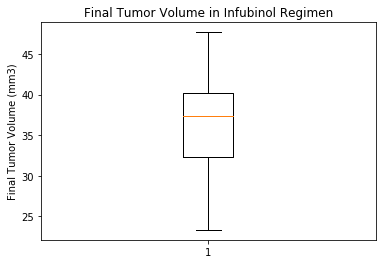

The lower quartile of tumor volumes observed for the Infubinol regimen is: 30.98 mm3
The upper quartile of tumor volumes observed for the Infubinol regimen is: 38.51 mm3
The interquartile range of tumor volumes observed for the Infubinol regimen is: 7.53 mm3
The the median of tumor volumes observed for the Infubinol regimen is: 34.85mm3 
Values below 19.69 mm3 could be outliers.
Values above 49.8 mm3 could be outliers.


In [153]:
promising_regimen = "Infubinol"
inf_data_all = last_df[last_df["Drug Regimen"].isin(["Ramicane"])]
inf_data_vol = inf_data_all.sort_values(["Tumor Volume (mm3)"], ascending=True)
inf_data_vol = inf_data_vol["Tumor Volume (mm3)"]
inf_data_vol

quartiles = inf_data_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_data_vol)
plt.show()

print(f"The lower quartile of tumor volumes observed for the {promising_regimen} regimen is: {round(lowerq,2)} mm3")
print(f"The upper quartile of tumor volumes observed for the {promising_regimen} regimen is: {round(upperq,2)} mm3")
print(f"The interquartile range of tumor volumes observed for the {promising_regimen} regimen is: {round(iqr,2)} mm3")
print(f"The the median of tumor volumes observed for the {promising_regimen} regimen is: {round(quartiles[0.5],2)}mm3 ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} mm3 could be outliers.")
print(f"Values above {round(upper_bound,2)} mm3 could be outliers.")

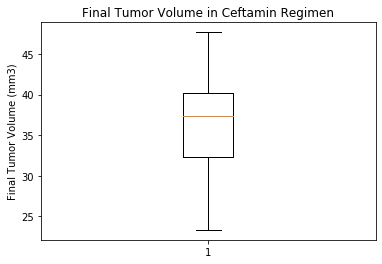

The lower quartile of tumor volumes observed for the Ceftamin regimen is: 30.98 mm3
The upper quartile of tumor volumes observed for the Ceftamin regimen is: 38.51 mm3
The interquartile range of tumor volumes observed for the Ceftamin regimen is: 7.53 mm3
The the median of tumor volumes observed for the Ceftamin regimen is: 34.85mm3 
Values below 19.69 mm3 could be outliers.
Values above 49.8 mm3 could be outliers.


In [154]:
promising_regimen = "Ceftamin"
cef_data_all = last_df[last_df["Drug Regimen"].isin(["Ramicane"])]
cef_data_vol = cef_data_all.sort_values(["Tumor Volume (mm3)"], ascending=True)
cef_data_vol = cef_data_vol["Tumor Volume (mm3)"]
cef_data_vol

quartiles = inf_data_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_data_vol)
plt.show()

print(f"The lower quartile of tumor volumes observed for the {promising_regimen} regimen is: {round(lowerq,2)} mm3")
print(f"The upper quartile of tumor volumes observed for the {promising_regimen} regimen is: {round(upperq,2)} mm3")
print(f"The interquartile range of tumor volumes observed for the {promising_regimen} regimen is: {round(iqr,2)} mm3")
print(f"The the median of tumor volumes observed for the {promising_regimen} regimen is: {round(quartiles[0.5],2)}mm3 ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} mm3 could be outliers.")
print(f"Values above {round(upper_bound,2)} mm3 could be outliers.")

## Line and scatter plots

In [155]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0, 0.5, 'Tumor Volume mm3')

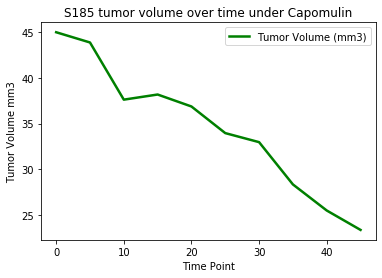

In [156]:
s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
s185_df = s185_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

s185plot = s185_df.set_index('Timepoint').plot(linewidth=2.5, color="green", title = "S185 tumor volume over time under Capomulin")
s185plot.set_xlabel("Time Point")
s185plot.set_ylabel("Tumor Volume mm3")

In [157]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [158]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [159]:
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap = average_cap.set_index('Mouse ID')
average_cap.head()

,Weight (g),Average Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


The correlation between both factors is 0.84


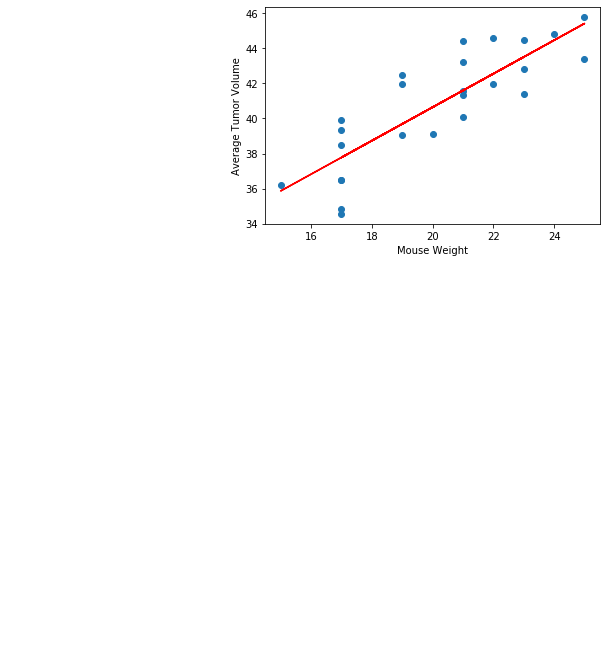

In [160]:
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = average_cap["Weight (g)"]
y_values = average_cap["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()